In [1]:
import os
import pandas as pd
import geopandas as gpd
%matplotlib notebook
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
os.getcwd()

'C:\\Users\\Shino Bear\\Desktop\\GIS Project Files'

Check directory

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'COD_MiningZones_2017.cpg',
 'COD_MiningZones_2017.dbf',
 'COD_MiningZones_2017.prj',
 'COD_MiningZones_2017.qpj',
 'COD_MiningZones_2017.shp',
 'COD_MiningZones_2017.shx',
 'cod_mining_zones_2017',
 'cod_mining_zones_2017.zip',
 'congo_map.png',
 'congo_mines.png',
 'Data Merge - OW-F2019.ipynb',
 'deaths.png',
 'gadm36_COD_0.cpg',
 'gadm36_COD_0.dbf',
 'gadm36_COD_0.prj',
 'gadm36_COD_0.shp',
 'gadm36_COD_0.shx',
 'gadm36_COD_1.cpg',
 'gadm36_COD_1.dbf',
 'gadm36_COD_1.prj',
 'gadm36_COD_1.shp',
 'gadm36_COD_1.shx',
 'gadm36_COD_2.cpg',
 'gadm36_COD_2.dbf',
 'gadm36_COD_2.prj',
 'gadm36_COD_2.shp',
 'gadm36_COD_2.shx',
 'gadm36_COD_shp',
 'gadm36_COD_shp.zip',
 'gedevents_2019_10_17.csv',
 'GIS Project.ipynb',
 'MINES.png',
 'PTS-2019.xlsx',
 'Spacial Stats for Congo - OW-F2019.ipynb']

In [5]:
deaths = pd.read_csv('gedevents_2019_10_17.csv', encoding='latin-1')

In [6]:
congo = gpd.read_file('gadm36_COD_1.shp')

<IPython.core.display.Javascript object>


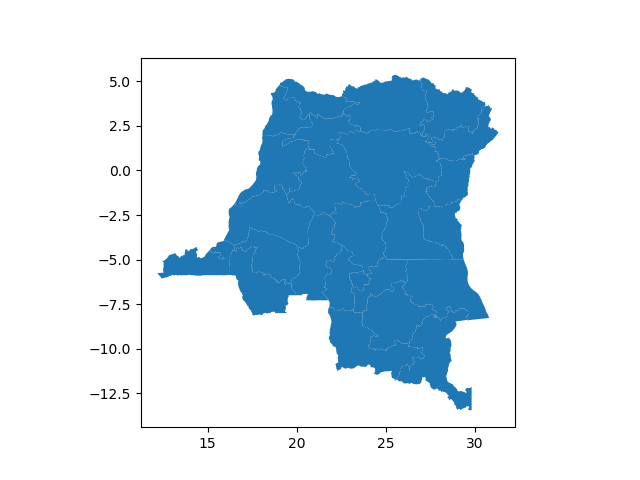

In [7]:
congo.plot()

In [8]:
deaths.describe()

,id,relid,year,type_of_violence,conflict_dset_id,conflict_new_id,dyad_dset_id,dyad_new_id,side_a_dset_id,side_a_new_id,side_b_dset_id,side_b_new_id,number_of_sources,where_prec,where_description,latitude,longitude,priogrid_gid,country_id,event_clarity,date_prec,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best_est,high_est,low_est
count,3798.000000,0.0,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,0.0,3798.000000,3798.000000,3798.000000,3798.0,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000
mean,104241.566351,NaN,2008.815692,2.288836,1901.400474,1901.400474,4344.531069,4344.531069,807.055819,807.055819,808.216693,808.216693,0.065034,1.796998,NaN,-1.480354,27.480093,127541.831754,490.0,1.132438,1.755924,2.531859,3.277778,18.763033,4.974460,29.547130,50.545814,27.012902
std,101546.422837,NaN,7.461374,0.889784,3481.839207,3481.839207,5318.024234,5318.024234,1600.951733,1600.951733,1753.354939,1753.354939,1.708623,1.026446,NaN,3.163889,3.555791,4552.386948,0.0,0.339011,1.265072,40.929636,27.429052,101.217418,57.488739,125.370855,473.280234,113.475189
min,6803.000000,NaN,1989.000000,1.000000,265.000000,265.000000,584.000000,584.000000,88.000000,88.000000,1.000000,1.000000,-1.000000,1.000000,NaN,-12.118270,12.350000,112016.000000,490.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24166.250000,NaN,2002.000000,1.000000,374.000000,374.000000,934.000000,934.000000,89.000000,89.000000,1.000000,1.000000,-1.000000,1.000000,NaN,-3.166670,27.550000,124979.000000,490.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,39417.000000,NaN,2009.000000,3.000000,547.000000,547.000000,1027.000000,1027.000000,422.000000,422.000000,1.000000,1.000000,-1.000000,1.000000,NaN,-1.303590,28.839768,127858.000000,490.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,3.000000
75%,237090.750000,NaN,2016.000000,3.000000,569.000000,569.000000,5347.000000,5347.000000,528.000000,528.000000,528.000000,528.000000,1.000000,2.000000,NaN,0.653370,29.400000,130739.750000,490.0,1.000000,2.000000,0.000000,0.000000,5.000000,0.000000,14.000000,17.000000,13.000000
max,285295.000000,NaN,2018.000000,3.000000,14547.000000,14547.000000,15826.000000,15826.000000,7089.000000,7089.000000,7269.000000,7269.000000,23.000000,7.000000,NaN,7.090405,31.000000,140086.000000,490.0,2.000000,5.000000,2363.000000,1000.000000,3200.000000,3000.000000,3200.000000,25000.000000,3200.000000


In [9]:
mines = gpd.read_file('COD_MiningZones_2017.shp')

<IPython.core.display.Javascript object>


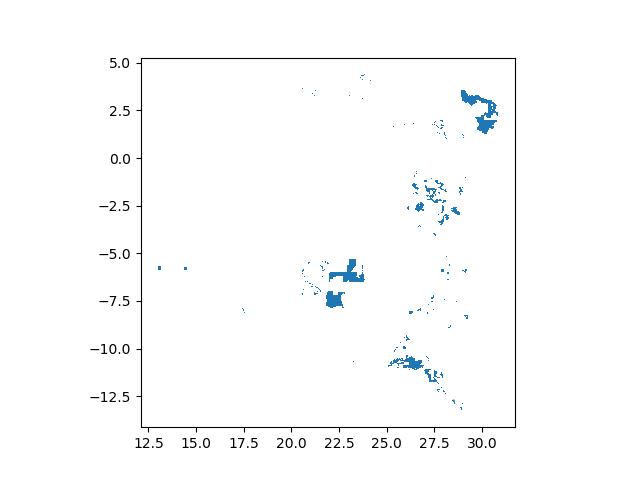

In [10]:
mines.plot()

In [11]:
keep_cols = ['year', 'where_coordinates', 'geom_wkt', 'side_a', 'side_b', 'deaths_a', 'deaths_b', 
             'deaths_civilians', 'deaths_unknown', 'best_est']

In [12]:
deaths_small = deaths[keep_cols]

In [13]:
deaths_small.head()

,year,where_coordinates,geom_wkt,side_a,side_b,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best_est
0,1993,DR Congo (Zaire),POINT (25.000000 0.000000),SPLM/A,Civilians,0,0,4,0,4
1,1996,Kamituga village,POINT (28.181944 -3.055278),CNDD,Civilians,0,0,50,0,50
2,2003,Kiliba town,POINT (29.203650 -3.260503),CNDD-FDD,Civilians,0,0,9,0,9
3,2003,Ndunda village,POINT (29.233390 -3.051007),CNDD-FDD,Civilians,0,0,16,0,16
4,1996,Kamituga village,POINT (28.181944 -3.055278),CNDD,Civilians,0,0,12,0,12


In [14]:
mines.head()

,Name,descriptio,tessellate,extrude,visibility,Demand 16,SNEL 16,OTHER 2016,GAP 2016,Demand 30,SNEL 30,OTHER 30,GAP 30,geometry
0,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.2250000003564 -10.8333333003332...
1,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.0583333001425 -10.9083333002918...
2,AFRICAN MINERALS (Barbados) Ltd Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((25.233333300243 -10.8333333003332 ...
3,AMB KASAI Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((20.5833333001417 -6.10833329994012...
4,AMB KASAI Sprl (100%),"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",-1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POLYGON Z ((20.5916666997412 -6.20833329995253...


<IPython.core.display.Javascript object>


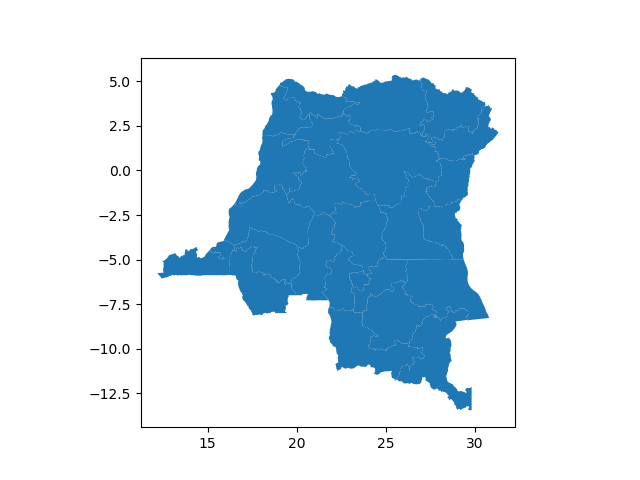

<IPython.core.display.Javascript object>


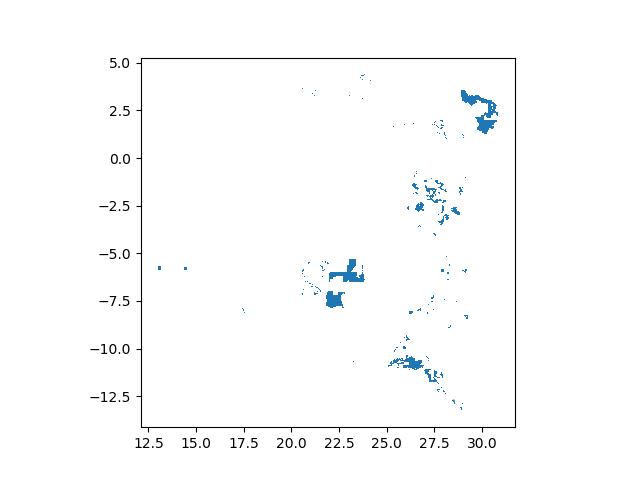

In [15]:
congo.plot()
mines.plot()

I want to try to get the mines to overlay the congo file and mark it as a different color.

<IPython.core.display.Javascript object>


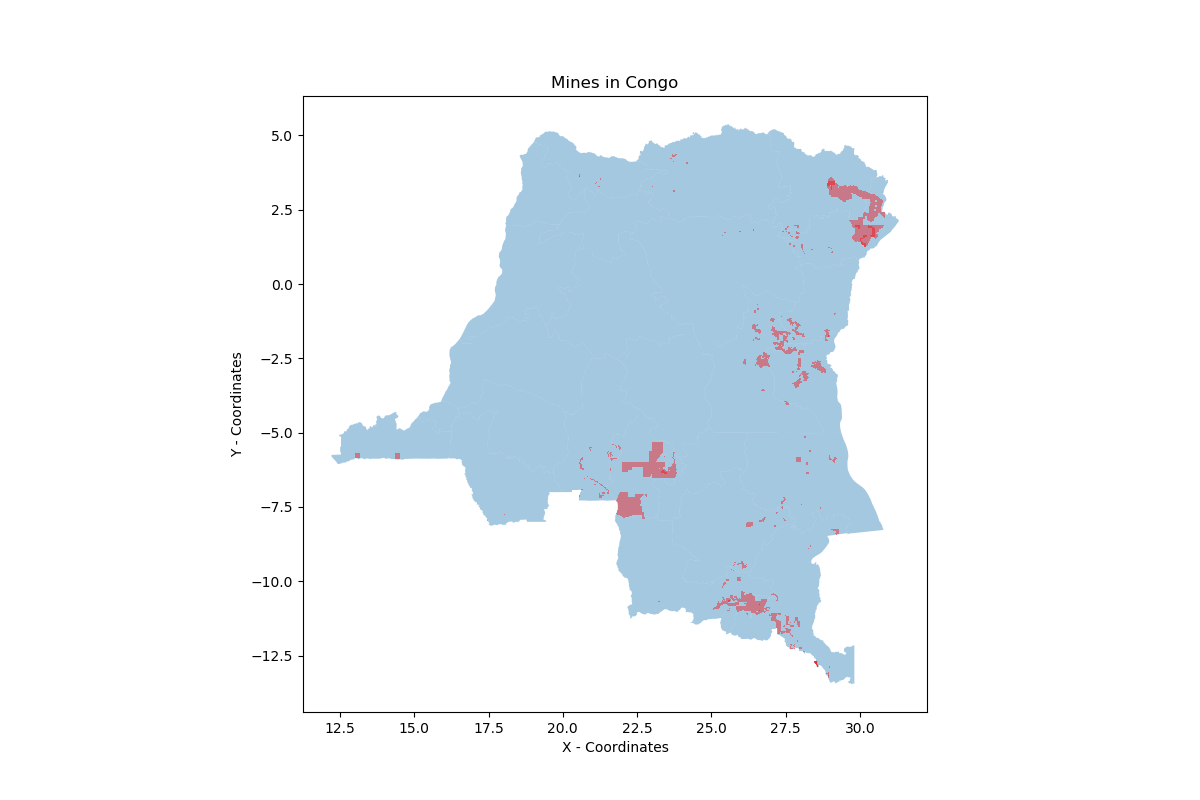

Text(0.5, 1.0, 'Mines in Congo')

In [16]:
fig, ax = plt.subplots(1, figsize=(12, 8))
congo.plot(ax=ax, alpha=0.4)
mines.plot(ax=ax, color='red', alpha=0.4)
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Mines in Congo")

I used the code from Lab 2's Florida Section. I really just needed to combine the two, so I'm happy.

Now I'm trying to figure out how to isolate indivudual years within my 'deaths' data.

In [17]:
deaths.year.describe()

count    3798.000000
mean     2008.815692
std         7.461374
min      1989.000000
25%      2002.000000
50%      2009.000000
75%      2016.000000
max      2018.000000
Name: year, dtype: float64

In [19]:
cross_98 = deaths.loc[deaths['year'] == 1998]

In [20]:
cross_98.head()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best_est,high_est,low_est
14,20199,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,585,585,Government of DR Congo (Zaire) - MLC,89,89,Government of DR Congo (Zaire),423,423,MLC,-1,"Agence France Presse dispatch, Kisangani, 13 N...",NaN,NaN,NaN,Red Cross,1,Dulia location,NaN,Orientale province,Aketi territory,2.950000,24.133333,POINT (24.133333 2.950000),133609,DR Congo (Zaire),490,Africa,1,1,11/29/1998 0:00,11/29/1998 0:00,122,0,0,0,122,150,122
18,20205,NaN,1998,True,Clear,3,548,548,RCD - Civilians,1015,1015,RCD - Civilians,424,424,RCD,1,1,Civilians,-1,http://www.congoned.dds.nl/chroni28.html,NaN,NaN,NaN,MISNA,1,Kalungu location,NaN,Sud Kivu province,Kalehe territory,-1.750000,29.010000,POINT (29.010000 -1.750000),127139,DR Congo (Zaire),490,Africa,1,1,12/15/1998 0:00,12/15/1998 0:00,0,0,8,0,8,8,8
20,20207,NaN,1998,True,Clear,3,467,467,Government of DR Congo (Zaire) - Civilians,934,934,Government of DR Congo (Zaire) - Civilians,89,89,Government of DR Congo (Zaire),1,1,Civilians,-1,A/53/365,NaN,NaN,NaN,NaN,1,Kimbanseke location,NaN,Kinshasa city region,Tshangu zone,-4.426111,15.374444,POINT (15.374444 -4.426111),123511,DR Congo (Zaire),490,Africa,1,1,2/9/1998 0:00,2/9/1998 0:00,0,0,2,0,2,2,2
21,20209,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,586,586,Government of DR Congo (Zaire) - RCD,89,89,Government of DR Congo (Zaire),424,424,RCD,-1,mewpan0020010925du83001d7,NaN,NaN,NaN,NaN,1,Kinshasa city,NaN,Kinshasa city province,NaN,-4.329722,15.315000,POINT (15.315000 -4.329722),123511,DR Congo (Zaire),490,Africa,1,1,8/3/1998 0:00,8/3/1998 0:00,20,0,10,0,30,30,30
32,20266,NaN,1998,True,Clear,1,283,283,DR Congo (Zaire): Government,586,586,Government of DR Congo (Zaire) - RCD,89,89,Government of DR Congo (Zaire),424,424,RCD,-1,"FOCUS - Congo rebels attack Kinshasa, army hit...",NaN,NaN,NaN,Residents in the suburb of Masina,1,Kinshasa city,NaN,Kinshasa city province,NaN,-4.329722,15.315000,POINT (15.315000 -4.329722),123511,DR Congo (Zaire),490,Africa,1,1,8/26/1998 0:00,8/26/1998 0:00,3,0,0,0,3,3,3


That works better.

In [21]:
cross_98_point = [Point(xy) for xy in zip(cross_98.longitude, cross_98.latitude)]

Ayyy, finally got it.

In [22]:
cross_98_gdf = gpd.GeoDataFrame(cross_98, geometry = cross_98_point)

In [23]:
from fiona.crs import from_epsg
cross_98_gdf.crs = from_epsg(4326)

In [24]:
cross_98_gdf.geometry

14                    POINT (24.133333 2.95)
18                       POINT (29.01 -1.75)
20               POINT (15.374444 -4.426111)
21                  POINT (15.315 -4.329722)
32                  POINT (15.315 -4.329722)
51               POINT (28.566667 -2.066667)
52                              POINT (25 0)
80                 POINT (23.78071 2.736971)
89               POINT (15.279722 -4.348611)
107                    POINT (29.466667 0.5)
140              POINT (28.860833 -2.508333)
144                      POINT (13.05 -5.85)
146               POINT (23.866666 3.816667)
152              POINT (28.860833 -2.508333)
155              POINT (28.860833 -2.508333)
164              POINT (28.860833 -2.508333)
166              POINT (28.860833 -2.508333)
168              POINT (28.860833 -2.508333)
185               POINT (22.466667 2.183333)
213              POINT (28.566667 -2.066667)
228                POINT (20.83333 3.333333)
229                POINT (20.83333 3.333333)
230       

<IPython.core.display.Javascript object>


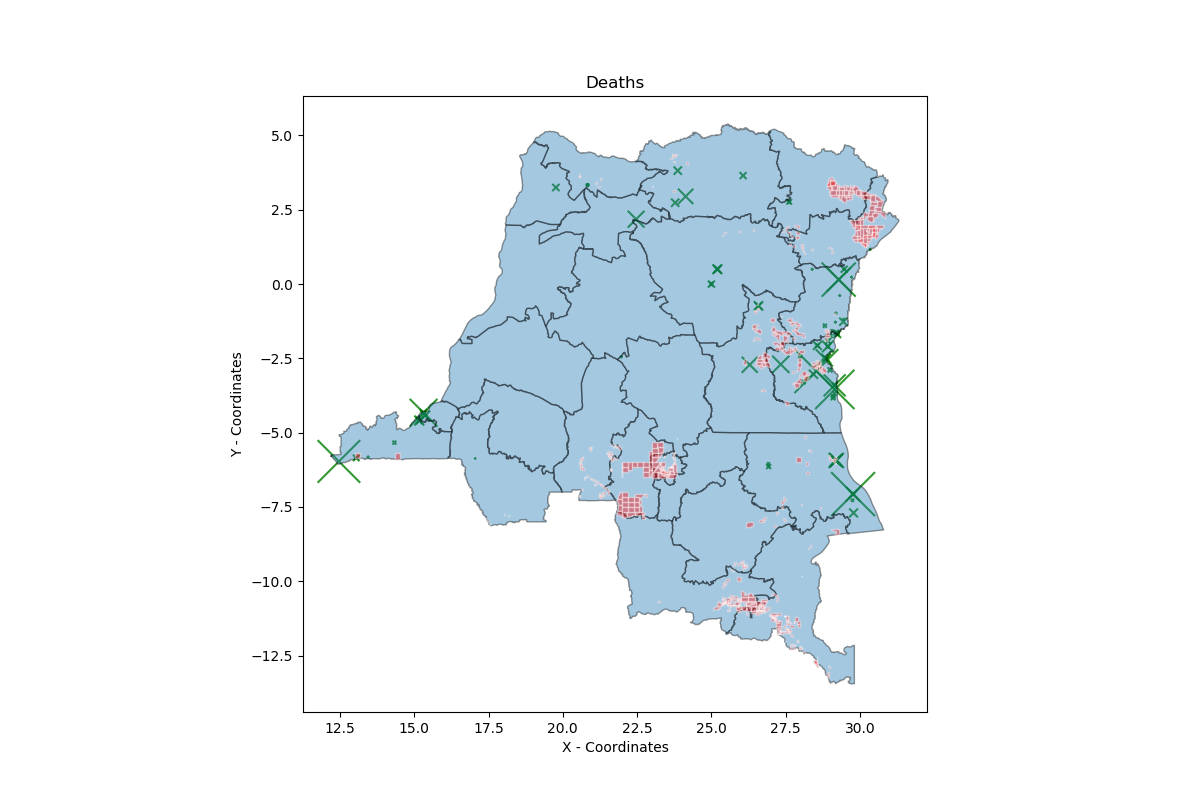

Text(0.5, 1.0, 'Deaths')

In [42]:
fig, ax = plt.subplots(1, figsize=(12, 8))
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['best_est'], color='green',alpha=.8)
congo.plot(ax=ax, alpha=0.4, edgecolor='black')
mines.plot(ax=ax, color='red', alpha=0.4, edgecolor='white')
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Deaths")



<IPython.core.display.Javascript object>


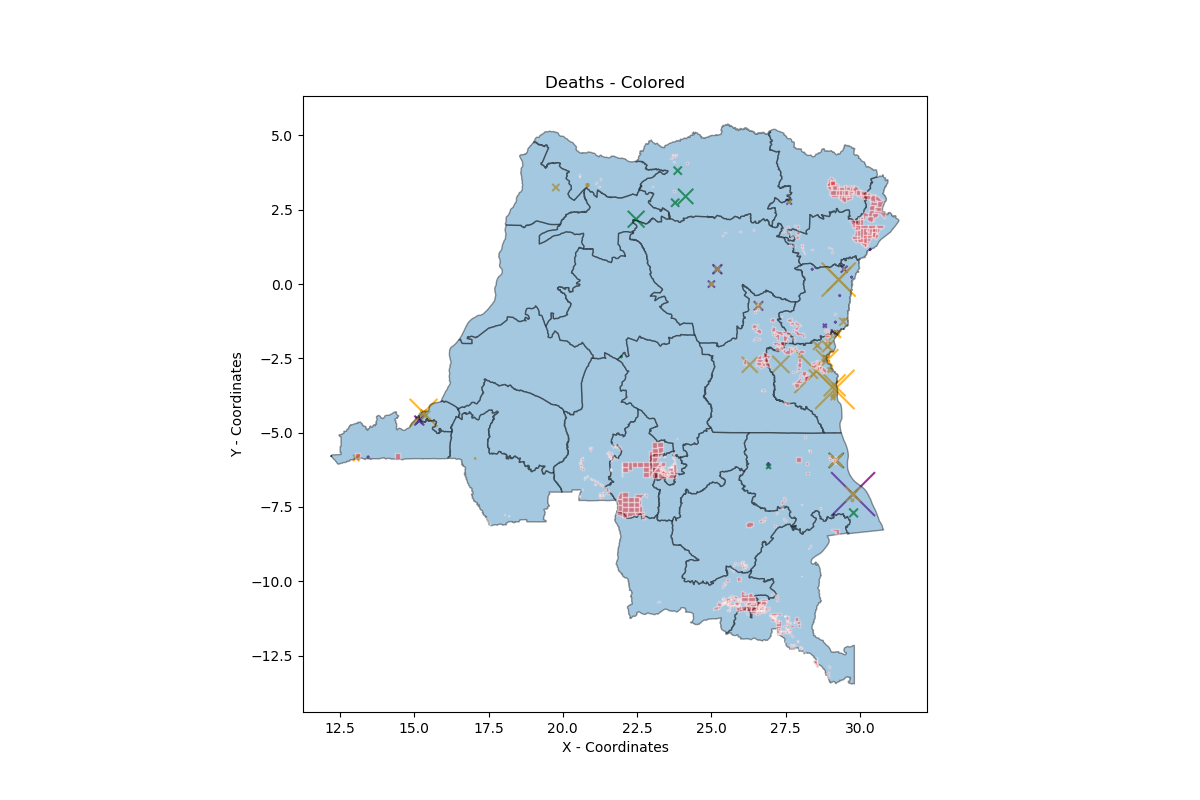

Text(0.5, 1.0, 'Deaths - Colored')

In [43]:
fig, ax = plt.subplots(1, figsize=(12, 8))
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['deaths_a'], color='green',alpha=.8)
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['deaths_b'], color='purple',alpha=.8)
cross_98_gdf.plot(ax=ax,marker='x', markersize=cross_98_gdf['deaths_civilians'], color='orange',alpha=.8)
congo.plot(ax=ax, alpha=0.4, edgecolor='black')
mines.plot(ax=ax, color='red', alpha=0.4, edgecolor='white')
ax.set_aspect('equal')
plt.ylabel("Y - Coordinates")
plt.xlabel("X - Coordinates")
plt.title("Deaths - Colored")